In [1]:
import pandas as pd
import fnmatch
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import pickle
import time
import keras
from sklearn.model_selection import train_test_split

In [2]:
Lab_tested_data = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Soil_Lab_Results - Sheet1.csv')
Lab_tested_data = Lab_tested_data.fillna(method='ffill')
Lab_tested_data.to_csv("Pre_processed_lab_tested_data.csv")

In [3]:
Sample_ID = Lab_tested_data.iloc[:,0]
pH_Value = Lab_tested_data.iloc[:,2]

In [4]:
def load_images_from_folder(folder):
    Labels = []
    for filename in os.listdir(folder):
        x = filename.split("_")
        id = float(x[0])
        img = cv2.imread(os.path.join(folder,filename))
        width = 1000
        height = 1000
        dim = (width, height)
        # resize image
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        img = img[500:800,500:800] #Resizing the image
        kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel) # applying the sharpening kernel.
        Result = Sample_ID.isin([id]) #checking image sample id exist in the lab results or not
        Result = Sample_ID[Result];
        if len(Result) >= 1:
            #Checking that if result greater than one means that sample id have two images
            if len(Result) > 1:  
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                Id_2_index = Result[1]
                print(id)
                #Taking average both inner and outer surface soil results 
                Labels.append([filename,img,(pH_Value[Id_1_index]+pH_Value[Id_2_index])/2])
            #Checking if there is only one image
            else:
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                print(id)
                Labels.append([filename,img,(pH_Value[Id_1_index])])
        else:
            continue
    return Labels

In [5]:
dataset = load_images_from_folder('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\testing_data')

110638.0
110638.0
110639.0
110639.0
110640.0
110640.0
110641.0
110641.0
110642.0
110642.0
110643.0
110643.0
110644.0
110644.0
110645.0
110645.0
110646.0
110646.0
110648.0
110648.0
110649.0
110649.0
110650.0
110650.0
110651.0
110651.0
110652.0
110652.0
110653.0
110653.0
110654.0
110654.0
110655.0
110655.0
110656.0
110656.0
110657.0
110657.0
110658.0
110658.0
110659.0
110659.0
110660.0
110660.0
110661.0
110661.0
110662.0
110662.0
110663.0
110663.0
110664.0
110664.0
110665.0
110665.0
110667.0
110667.0
110734.0
110734.0
110735.0
110735.0
110736.0
110736.0
110737.0
110737.0
110738.0
110738.0
110740.0
110740.0
110745.0
110745.0
110746.0
110746.0
110747.0
110747.0
110749.0
110749.0
110750.0
110750.0
110752.0
110752.0
110753.0
110753.0
110755.0
110755.0
110756.0
110756.0
110757.0
110757.0
110759.0
110759.0
110760.0
110760.0
110761.0
110761.0
110762.0
110762.0
110763.0
110763.0
110766.0
110766.0
110767.0
110767.0
110768.0
110768.0
110773.0
110773.0
110775.0
110775.0
110776.0
110776.0
110777.0
1

In [6]:
X = []
Y = []
for data in dataset:
    X.append(data[1])
    Y.append(data[2])
print(Y)

[7.95, 7.95, 7.9, 7.9, 7.75, 7.75, 7.9, 7.9, 7.75, 7.75, 8.2, 8.2, 7.75, 7.75, 7.7, 7.7, 7.8, 7.8, 7.85, 7.85, 7.9, 7.9, 7.9, 7.9, 7.95, 7.95, 8.0, 8.0, 7.85, 7.85, 7.65, 7.65, 7.95, 7.95, 7.85, 7.85, 7.65, 7.65, 7.75, 7.75, 8.05, 8.05, 7.7, 7.7, 8.0, 8.0, 7.85, 7.85, 8.2, 8.2, 7.75, 7.75, 7.75, 7.75, 7.8, 7.8, 7.85, 7.85, 8.149999999999999, 8.149999999999999, 7.85, 7.85, 7.9, 7.9, 7.800000000000001, 7.800000000000001, 7.95, 7.95, 7.9, 7.9, 8.0, 8.0, 7.6, 7.6, 7.9, 7.9, 7.6, 7.6, 7.85, 7.85, 7.800000000000001, 7.800000000000001, 8.0, 8.0, 7.95, 7.95, 7.65, 7.65, 8.05, 8.05, 7.85, 7.85, 7.7, 7.7, 7.95, 7.95, 8.05, 8.05, 7.95, 7.95, 7.9, 7.9, 7.880000000000001, 7.880000000000001, 8.05, 8.05, 7.85, 7.85, 8.05, 8.05, 7.85, 7.85, 7.7, 7.7, 7.7, 7.7, 7.65, 7.65, 7.75, 7.75, 7.75, 7.75, 7.65, 7.65, 7.65, 7.65, 7.75, 7.75, 7.7, 7.7, 7.75, 7.75, 7.55, 7.55, 7.9, 7.9, 8.055, 8.055, 7.7, 7.7, 7.75, 7.75, 7.95, 7.95, 7.45, 7.45, 7.7, 7.7, 7.45, 7.45, 7.75, 7.75, 7.95, 7.95, 8.25, 8.25, 8.0, 8.0, 7

In [7]:
img_size = 300
X = np.array(X).reshape(-1, img_size, img_size, 3)
print(X[0].shape)
Y = np.array(Y)
print(Y)

(300, 300, 3)
[7.95  7.95  7.9   7.9   7.75  7.75  7.9   7.9   7.75  7.75  8.2   8.2
 7.75  7.75  7.7   7.7   7.8   7.8   7.85  7.85  7.9   7.9   7.9   7.9
 7.95  7.95  8.    8.    7.85  7.85  7.65  7.65  7.95  7.95  7.85  7.85
 7.65  7.65  7.75  7.75  8.05  8.05  7.7   7.7   8.    8.    7.85  7.85
 8.2   8.2   7.75  7.75  7.75  7.75  7.8   7.8   7.85  7.85  8.15  8.15
 7.85  7.85  7.9   7.9   7.8   7.8   7.95  7.95  7.9   7.9   8.    8.
 7.6   7.6   7.9   7.9   7.6   7.6   7.85  7.85  7.8   7.8   8.    8.
 7.95  7.95  7.65  7.65  8.05  8.05  7.85  7.85  7.7   7.7   7.95  7.95
 8.05  8.05  7.95  7.95  7.9   7.9   7.88  7.88  8.05  8.05  7.85  7.85
 8.05  8.05  7.85  7.85  7.7   7.7   7.7   7.7   7.65  7.65  7.75  7.75
 7.75  7.75  7.65  7.65  7.65  7.65  7.75  7.75  7.7   7.7   7.75  7.75
 7.55  7.55  7.9   7.9   8.055 8.055 7.7   7.7   7.75  7.75  7.95  7.95
 7.45  7.45  7.7   7.7   7.45  7.45  7.75  7.75  7.95  7.95  8.25  8.25
 8.    8.    7.75  7.75  7.85  7.85  7.65  7.65  7.65  7

In [8]:
len(X)

701

In [9]:
#AlexNet Architecture for P estimation
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(300,300,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 73, 73, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 36, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 384)       8

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, Y)
print(X_train.shape)

(525, 300, 300, 3)


In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.4)
predictions = model.predict(X_val)

Epoch 1/50
10/10 [==============================] - 10s 638ms/step - loss: 138245.7500 - mse: 138245.7500 - mae: 129.1447 - val_loss: 3518854.7500 - val_mse: 3518854.7500 - val_mae: 1861.2561
Epoch 2/50
10/10 [==============================] - 2s 194ms/step - loss: 295.0719 - mse: 295.0719 - mae: 10.5147 - val_loss: 51019940.0000 - val_mse: 51019940.0000 - val_mae: 7110.8472
Epoch 3/50
10/10 [==============================] - 2s 194ms/step - loss: 79.6815 - mse: 79.6815 - mae: 5.8604 - val_loss: 9540061.0000 - val_mse: 9540061.0000 - val_mae: 3072.5298
Epoch 4/50
10/10 [==============================] - 2s 193ms/step - loss: 25.0711 - mse: 25.0711 - mae: 3.3713 - val_loss: 897078.7500 - val_mse: 897078.7500 - val_mae: 941.2379
Epoch 5/50
10/10 [==============================] - 2s 193ms/step - loss: 17.9014 - mse: 17.9014 - mae: 3.0929 - val_loss: 328330.7188 - val_mse: 328330.7188 - val_mae: 568.4783
Epoch 6/50
10/10 [==============================] - 2s 193ms/step - loss: 16.4419 - m

10/10 [==============================] - 2s 196ms/step - loss: 2.8327 - mse: 2.8327 - mae: 1.3490 - val_loss: 1.0807 - val_mse: 1.0807 - val_mae: 0.7256
Epoch 50/50
10/10 [==============================] - 2s 194ms/step - loss: 2.6950 - mse: 2.6950 - mae: 1.3264 - val_loss: 2.1220 - val_mse: 2.1220 - val_mae: 1.1604


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


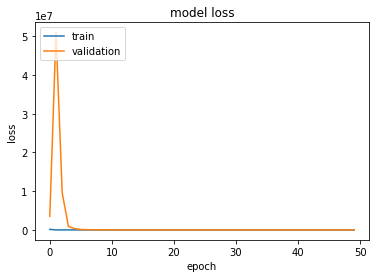

In [12]:
import matplotlib.pyplot as plt 
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

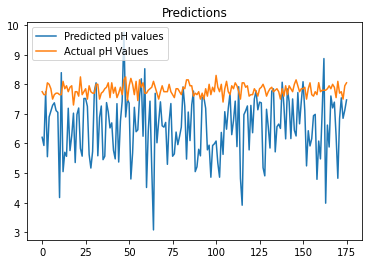

In [13]:

plt.plot(predictions)
plt.plot(y_val)
plt.title('Predictions')
plt.legend(['Predicted pH values', 'Actual pH Values'], loc='upper left')
plt.show()

In [14]:
dataset[0][1].shape

(300, 300, 3)

In [15]:
dataset[0][2]

7.95

In [16]:
import tensorflow as tf

In [17]:
tf.test.gpu_device_name()

'/device:GPU:0'